In [90]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import opendatasets as os
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('D:\DL\env\datasets\dataset_classification.csv')
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [92]:
data['Sex']= data['Sex'].apply(lambda x: 1 if x=='Male' else 0)
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [93]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
 2   Sex     205 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


In [94]:
X=data.drop('Sex',axis=1)
y=data['Sex']

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=['Height','Weight'])

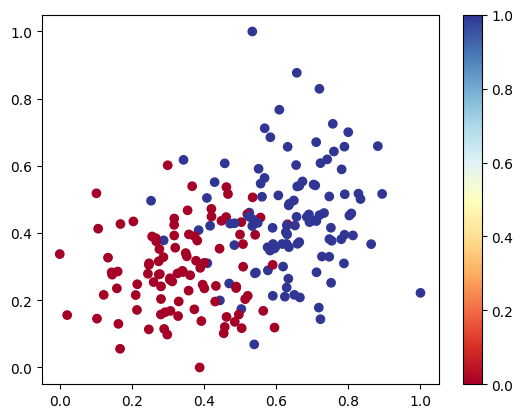

In [96]:
plt.scatter(X['Height'],X['Weight'],c=y,cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
y.dtype

dtype('int64')

### Model Building

In [99]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Comppile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
ephochs_number=20
history = model.fit(X_train, y_train, epochs=ephochs_number)

Epoch 1/20


d:\DL\env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5427 - loss: 0.6869
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5305 - loss: 0.6521 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5427 - loss: 0.6316  
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6524 - loss: 0.5964 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5570 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.5172 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8110 - loss: 0.4606 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.4064 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8415 - loss: 0.3593 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.3253 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8354 - loss: 0.3100 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8659 - loss: 0.3099 
Epoch 13/20


In [100]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

### Model Evaluate

In [101]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9024 - loss: 0.2599 


[0.2598734498023987, 0.9024389982223511]

In [102]:
y_pred=model.predict(X_test)
y_pred[:5]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.8848491 , 0.11515095],
       [0.02529801, 0.974702  ],
       [0.00963081, 0.99036914],
       [0.76240265, 0.23759735],
       [0.03344585, 0.9665541 ]], dtype=float32)

In [103]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [104]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

### Precision

In [105]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

### Recall

In [106]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

In [107]:
history.history

{'accuracy': [0.542682945728302,
  0.5304877758026123,
  0.542682945728302,
  0.6524389982223511,
  0.75,
  0.7682926654815674,
  0.8109756112098694,
  0.8597561120986938,
  0.8414633870124817,
  0.8597561120986938,
  0.8353658318519592,
  0.8658536672592163,
  0.8536585569381714,
  0.8780487775802612,
  0.8719512224197388,
  0.8719512224197388,
  0.8719512224197388,
  0.8719512224197388,
  0.8597561120986938,
  0.8536585569381714],
 'loss': [0.6868582963943481,
  0.6521137356758118,
  0.6316073536872864,
  0.5964322686195374,
  0.5570052266120911,
  0.5171652436256409,
  0.4605683982372284,
  0.4064232110977173,
  0.35926389694213867,
  0.32528552412986755,
  0.31004592776298523,
  0.30989834666252136,
  0.29903337359428406,
  0.28165408968925476,
  0.2846642732620239,
  0.2891584634780884,
  0.28283435106277466,
  0.2773430645465851,
  0.2773093283176422,
  0.27976512908935547]}

<Axes: >

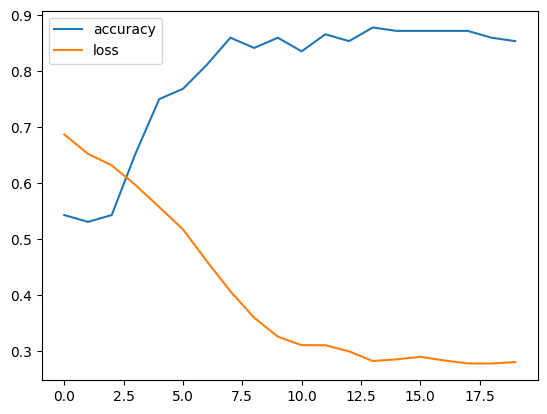

In [108]:
pd.DataFrame(history.history).plot()